CB.EN.U4.CSE20247

Part 1

In [20]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

1. Null and Alternate hypothesis

    H_0: The frequencies of the flowers in the sample is inline with the hypothesized frequencies.

    freq = [0.25, 0.75]

    H_1: The hypothesized frequencies do not correspond the sample frequencies

    freq not equal to [0.25, 0.75]

In [25]:

df = pd.DataFrame({"Color":["White","Purple"],"Hypothesis":[0.25,0.75],"Sample":[(929-752)/929, 752/929]})
df

,Color,Hypothesis,Sample
0,White,0.25,0.190527
1,Purple,0.75,0.809473


2. The test statistic used here is z score of __TVD__.

    TVD is defined as frac\Sigma |dist_1 - dist_2|}{2}

    Since 1753 is not smaller than 30 the z score can be used.

In [23]:
def tvd(dist1, dist2):
    return abs(np.subtract(dist1, dist2)).sum() / 2

In [26]:
given_tvd = tvd(df["Hypothesis"],df["Sample"])
print(given_tvd)

0.0594725511302476


3. The observed TVD is 0.059. The empirical p value of 0.059 is 0.10

In [27]:
def sample_proportions(sample_size, probabilities):
    return np.random.multinomial(sample_size, probabilities)/ sample_size

In [31]:
sampling_tvd = []
for _ in range(2000-247):
    tmp = sample_proportions(929, df["Hypothesis"])
    sampling_tvd.append(tvd(tmp, df["Hypothesis"]))

In [32]:
np.count_nonzero(sampling_tvd >= given_tvd) / len(sampling_tvd)

0.0005704506560182544

In [28]:
stats.norm.ppf(0.10)

-1.2815515655446004

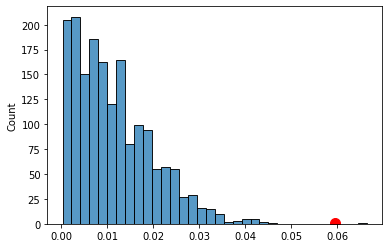

In [33]:
fig, ax = plt.subplots()
sns.histplot(ax=ax, x=sampling_tvd)
plt.scatter(given_tvd, 1, marker="o", s=100, color="r")
plt.show()

6. Outcome

    The empirical probability of obtaining a sample with atleast the TVD of the given sample is 0.10, which is 10. Since 10 is greater than both of the most commonly used\alpha values [5,1], the  Null hypothesis cannot be rejected. Mendel hypothesis that purple and white flowers of pea plant grow in the ratio of 3:1 cannot be rejected.

Part 2


In [16]:
import math
import numpy as np
import scipy.stats as st
from numpy.random import randn
from statsmodels.stats.weightstats import ztest
n = 30
xbar = 65.10
mu = 60
sigma = 13.46
alpha = 0.05
z_criticalnve = st.norm.ppf(alpha)
z_criticalpve=abs(st.norm.ppf(alpha))
z = (xbar-mu)/(sigma/np.sqrt(n))
if (z < z_criticalpve and z>z_criticalnve):
    print("Null hypothesis cannot be rejected,(Z test)")
else:
    print("Reject null hypothesis,(Z test)")
p_val = (1 - st.norm.cdf(abs(z))) *2
if (p_val > alpha):
    print("Null hypothesis cannot be rejected,(p value)")
else:
    print("Reject null hypothesis,(p value)")
print("Z_critical negative:",z_criticalnve)
print("Z_critical positive:",z_criticalpve)
print("Z:",z)
print("p_value:",p_val)

Reject null hypothesis,(Z test)
Reject null hypothesis,(p value)
Z_critical negative: -1.6448536269514729
Z_critical positive: 1.6448536269514729
Z: 2.075323211943792
p_value: 0.03795658956990633
